# Prediksi Performa Akademik Mahasiswa Berdasarkan Gaya Hidup dan Dukungan Sosial Menggunakan Random Forest

Nama  : Royan Ristu Prayoga

Nim   : 22.11.5226

Kelas : Proyek Data Mining 7

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('drive/My Drive/Data Mining/enhanced_student_habits_performance_dataset.csv')

In [ ]:
df.head()

,student_id,age,gender,major,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,...,screen_time,study_environment,access_to_tutoring,family_income_range,parental_support_level,motivation_level,exam_anxiety_score,learning_style,time_management_score,exam_score
0,100000,26,Male,Computer Science,7.645367,3.0,0.1,Yes,70.3,6.2,...,10.9,Co-Learning Group,Yes,High,9,7,8,Reading,3.0,100
1,100001,28,Male,Arts,5.700000,0.5,0.4,No,88.4,7.2,...,8.3,Co-Learning Group,Yes,Low,7,2,10,Reading,6.0,99
2,100002,17,Male,Arts,2.400000,4.2,0.7,No,82.1,9.2,...,8.0,Library,Yes,High,3,9,6,Kinesthetic,7.6,98
3,100003,27,Other,Psychology,3.400000,4.6,2.3,Yes,79.3,4.2,...,11.7,Co-Learning Group,Yes,Low,5,3,10,Reading,3.2,100
4,100004,25,Female,Business,4.700000,0.8,2.7,Yes,62.9,6.5,...,9.4,Quiet Room,Yes,Medium,9,1,10,Reading,7.1,98


Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


In [ ]:
print(df.info)

<bound method DataFrame.info of        student_id  age  gender             major  study_hours_per_day  \
0          100000   26    Male  Computer Science             7.645367   
1          100001   28    Male              Arts             5.700000   
2          100002   17    Male              Arts             2.400000   
3          100003   27   Other        Psychology             3.400000   
4          100004   25  Female          Business             4.700000   
...           ...  ...     ...               ...                  ...   
79995      179995   16    Male       Engineering             3.700000   
79996      179996   16  Female          Business             1.200000   
79997      179997   26  Female              Arts             4.100000   
79998      179998   23   Other           Biology             3.800000   
79999      179999   25   Other       Engineering             3.000000   

       social_media_hours  netflix_hours part_time_job  attendance_percentage  \
0         

In [ ]:
print("Cek Missing Values:")
print(df.isnull().sum())
print("Jumlah Duplikat:", df.duplicated().sum())

Cek Missing Values:
student_id                       0
age                              0
gender                           0
major                            0
study_hours_per_day              0
social_media_hours               0
netflix_hours                    0
part_time_job                    0
attendance_percentage            0
sleep_hours                      0
diet_quality                     0
exercise_frequency               0
parental_education_level         0
internet_quality                 0
mental_health_rating             0
extracurricular_participation    0
previous_gpa                     0
semester                         0
stress_level                     0
dropout_risk                     0
social_activity                  0
screen_time                      0
study_environment                0
access_to_tutoring               0
family_income_range              0
parental_support_level           0
motivation_level                 0
exam_anxiety_score               0


In [ ]:
# Drop kolom yang tidak digunakan
df_cleaned = df.drop(columns=["student_id", "major"])

# Label encoding untuk kolom kategorikal (jika ada)
le = LabelEncoder()
categorical_cols = df_cleaned.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df_cleaned[col] = le.fit_transform(df_cleaned[col])


In [ ]:
# Pisahkan fitur (X) dan target (y)
X = df_cleaned.drop('exam_score', axis=1)
y = df_cleaned['exam_score']

# Drop rows where the target variable y has missing values
# We drop the corresponding rows from both X and y to maintain consistency
rows_with_nan_y = y.isnull()
X = X[~rows_with_nan_y]
y = y[~rows_with_nan_y]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Standardisasi fitur numerik
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Feature Importances (Random Forest):
previous_gpa                     0.875700
attendance_percentage            0.010332
time_management_score            0.009043
stress_level                     0.008841
sleep_hours                      0.008540
mental_health_rating             0.008479
study_hours_per_day              0.008415
screen_time                      0.007962
social_media_hours               0.007667
netflix_hours                    0.007632
age                              0.005425
parental_support_level           0.004910
exercise_frequency               0.004283
semester                         0.004276
motivation_level                 0.003661
social_activity                  0.003553
parental_education_level         0.003150
study_environment                0.003117
learning_style                   0.002595
internet_quality                 0.001927
gender                           0.001886
family_income_range              0.001854
diet_quality                     0.001

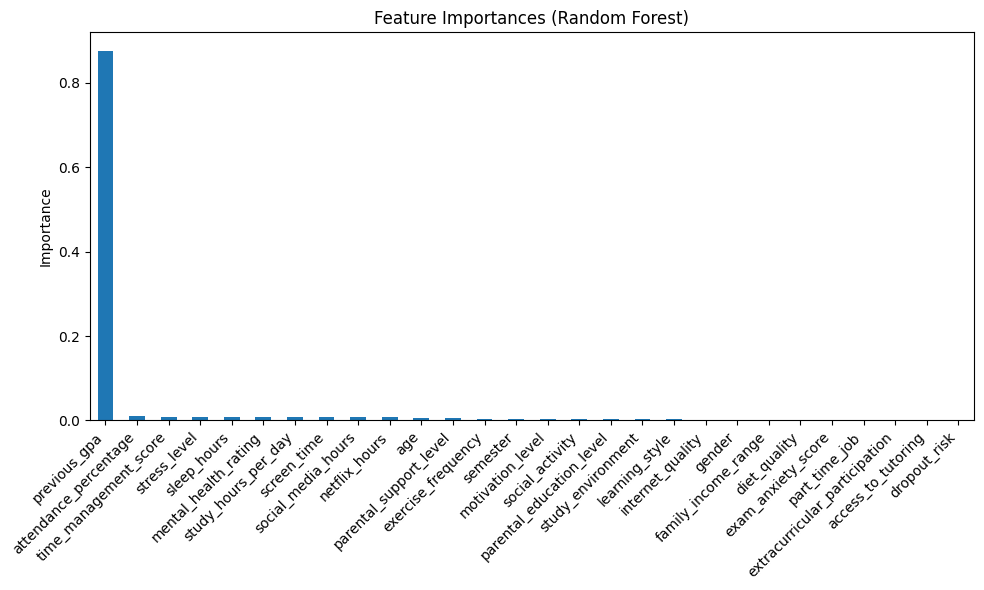

In [ ]:
# Feature Importance menggunakan Random Forest
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, y)

feature_importances = pd.Series(model.feature_importances_, index=X.columns)
sorted_feature_importances = feature_importances.sort_values(ascending=False)

print("\nFeature Importances (Random Forest):")
print(sorted_feature_importances)

# Visualisasi Feature Importance
plt.figure(figsize=(10, 6))
sorted_feature_importances.plot(kind='bar')
plt.title('Feature Importances (Random Forest)')
plt.ylabel('Importance')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
X_selected = df[['previous_gpa','attendance_percentage','study_hours_per_day','stress_level','screen_time','time_management_score']]
y_target = df['exam_score']

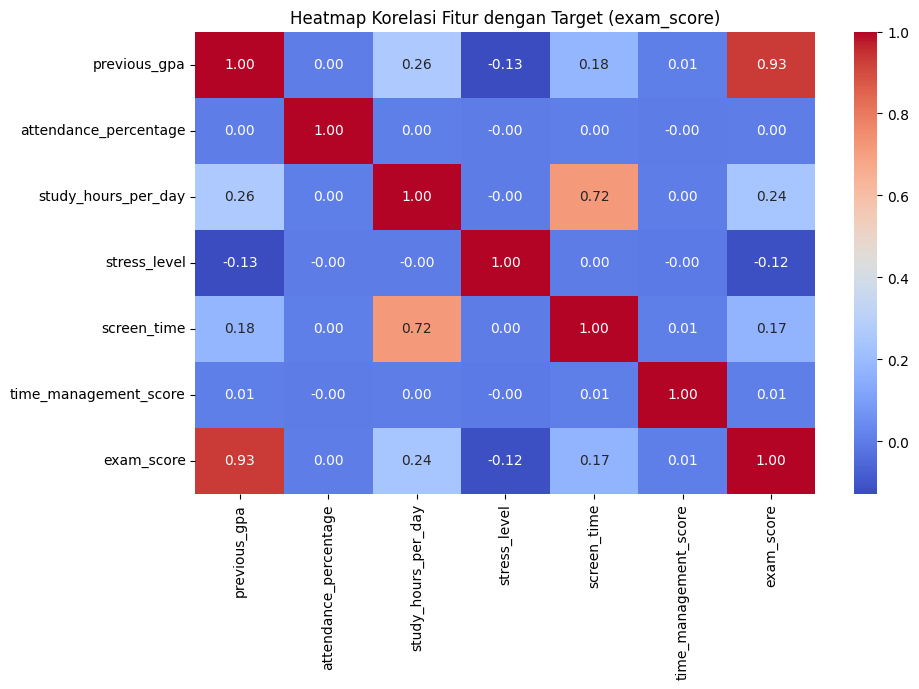

In [ ]:
# Gabungkan X dan y untuk korelasi
df_corr = X_selected.copy()
df_corr['exam_score'] = y_target

# Heatmap korelasi
plt.figure(figsize=(10, 6))
sns.heatmap(df_corr.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Heatmap Korelasi Fitur dengan Target (exam_score)")
plt.show()


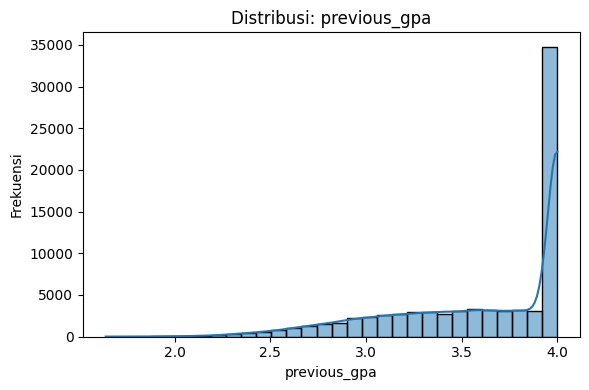

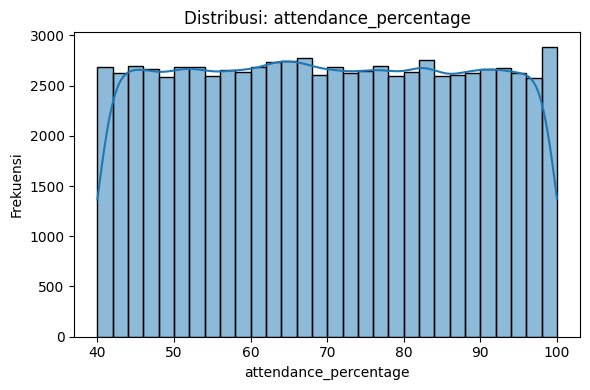

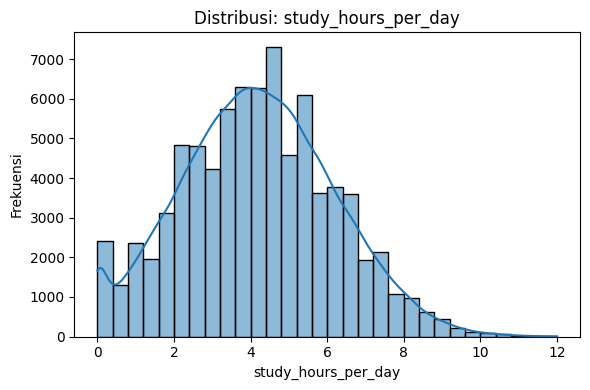

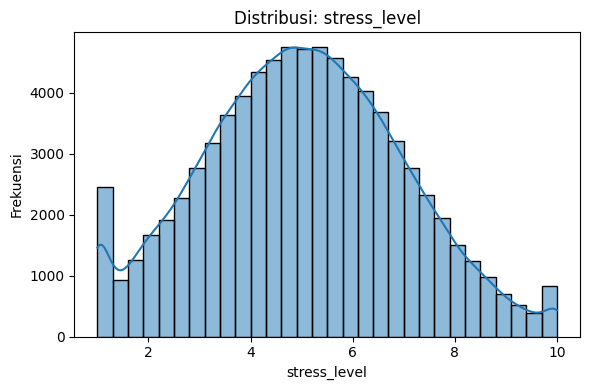

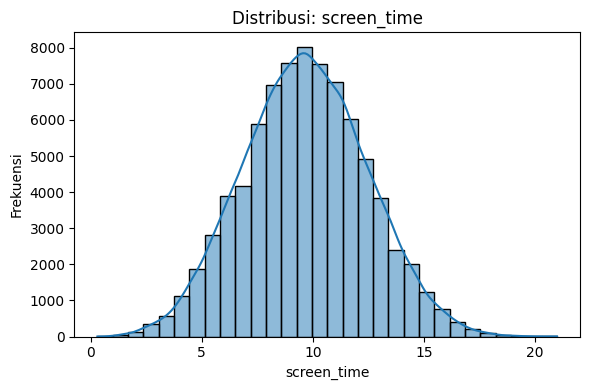

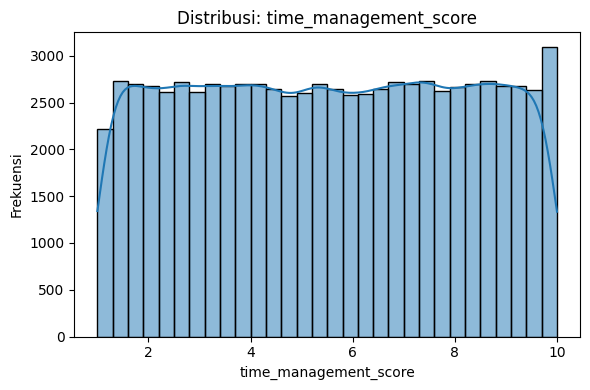

In [ ]:
# Plot distribusi untuk masing-masing fitur
for col in X_selected.columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(X_selected[col], kde=True, bins=30)
    plt.title(f'Distribusi: {col}')
    plt.xlabel(col)
    plt.ylabel('Frekuensi')
    plt.tight_layout()
    plt.show()

In [ ]:
# 1. Ambil fitur yang ingin dipakai
X_selected = df[['previous_gpa','attendance_percentage','study_hours_per_day','stress_level','screen_time','time_management_score']]
y_target = df['exam_score']

# 2. Split dan train
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import joblib

X_train, X_test, y_train, y_test = train_test_split(X_selected, y_target, test_size=0.2, random_state=42)
rf_model = RandomForestRegressor(n_estimators=200, random_state=42, n_jobs=-1, max_depth=10)
rf_model.fit(X_train, y_train)

# 3. Save model
joblib.dump(rf_model, 'random_forest_model.pkl')


['random_forest_model.pkl']

In [ ]:
#evaluasi
# Prediksi pada data test
y_pred_rf = rf_model.predict(X_test)

mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("\nEvaluasi Model Random Forest Regressor:")
print(f"Mean Absolute Error (MAE): {mae_rf:.4f}")
print(f"Mean Squared Error (MSE): {mse_rf:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_rf:.4f}")
print(f"R-squared (R2): {r2_rf:.4f}")


Evaluasi Model Random Forest Regressor:
Mean Absolute Error (MAE): 3.2344
Mean Squared Error (MSE): 17.4539
Root Mean Squared Error (RMSE): 4.1778
R-squared (R2): 0.8711


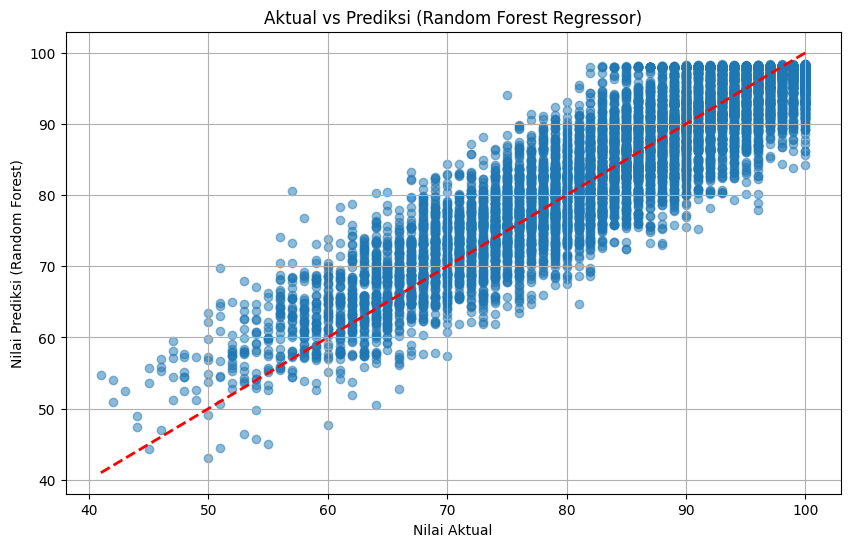

In [ ]:
# Visualisasi hasil prediksi vs aktual
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Nilai Aktual")
plt.ylabel("Nilai Prediksi (Random Forest)")
plt.title("Aktual vs Prediksi (Random Forest Regressor)")
plt.grid(True)
plt.show()

In [ ]:
!pip install streamlit -q

In [ ]:
!wget -q -O - ipv4.icanhazip.com

34.59.56.183


In [ ]:
!streamlit run app.py & npx localtunnel --port 8501

⠙⠹

⠸⠼⠴⠦⠧
  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.59.56.183:8501

your url is: https://plenty-donuts-stand.loca.lt
/root/.npm/_npx/75ac80b86e83d4a2/node_modules/localtunnel/bin/lt.js:81
    throw err;
    ^

Error: connection refused: localtunnel.me:13163 (check your firewall settings)
    at Socket.<anonymous> (/root/.npm/_npx/75ac80b86e83d4a2/node_modules/localtunnel/lib/TunnelCluster.js:52:11)
    at Socket.emit (node:events:524:28)
    at emitErrorNT (node:internal/streams/destroy:169:8)
    at emitErrorCloseNT (node:internal/streams/destroy:128:3)
    at process.processTicksAndRejections (node:internal/process/task_queues:82:21)

Node.js v20.19.0
⠙